In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [10]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [11]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
df = pd.DataFrame(iris.data, columns=iris['feature_names'])
df['iris type'] = iris.target
df['iris name'] = df['iris type'].apply(lambda x: 'sentosa' if x==0 else ('versicolor' if x==1 else 'virginica'))
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris type,iris name
26,5.0,3.4,1.6,0.4,0,sentosa
46,5.1,3.8,1.6,0.2,0,sentosa
71,6.1,2.8,4.0,1.3,1,versicolor
132,6.4,2.8,5.6,2.2,2,virginica
25,5.0,3.0,1.6,0.2,0,sentosa


In [17]:
df.shape

(150, 6)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   iris type          150 non-null    int64  
 5   iris name          150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [20]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


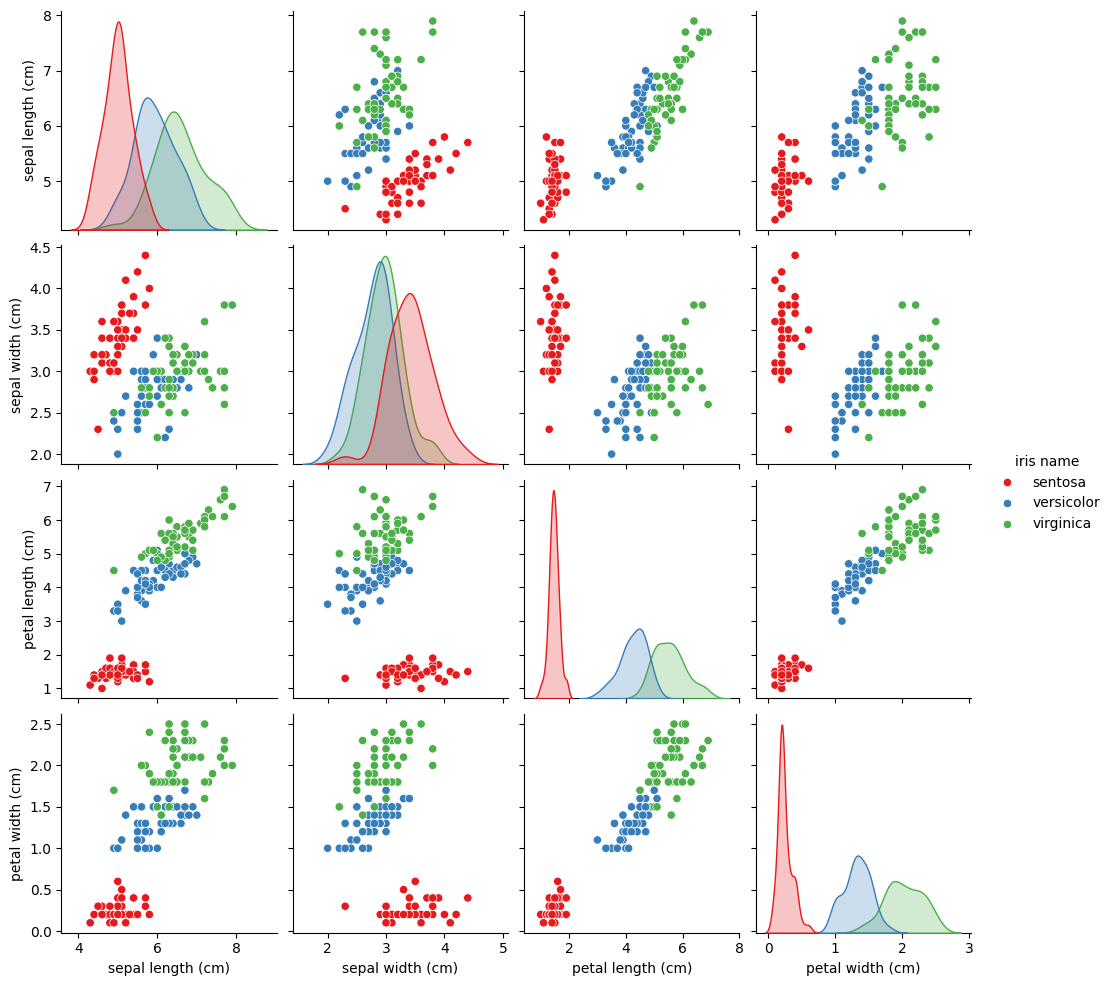

In [24]:
sns.pairplot(df, hue = 'iris name', 
             vars = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], 
             palette = 'Set1' );

In [25]:
X = iris['data']
y = iris['target']

In [36]:
# standardize data
mean = np.mean(X, axis=0)
stdev = np.std(X, axis=0)
X = (X - mean) / stdev

In [40]:
# covarience matrix
cov_mat = np.cov(X.T)

In [41]:
cov_mat

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [45]:
# eigenvalues & eigenvectors
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [46]:
eig_vals

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [47]:
eig_vecs

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [48]:
# sorting eigenvectors
eig_vecs = eig_vecs.T
idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[idx]

In [49]:
eig_vals

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [50]:
eig_vecs

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [-0.37741762, -0.92329566, -0.02449161, -0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [ 0.26128628, -0.12350962, -0.80144925,  0.52359713]])

In [51]:
# choose principal components
k = 2    # select top k eigenvectors
cmpt = eig_vecs[:k]

In [54]:
cmpt.shape

(2, 4)

In [55]:
# transform into k dimension
X_new = X_std.dot(cmpt.T)

In [56]:
X_new.shape

(150, 2)

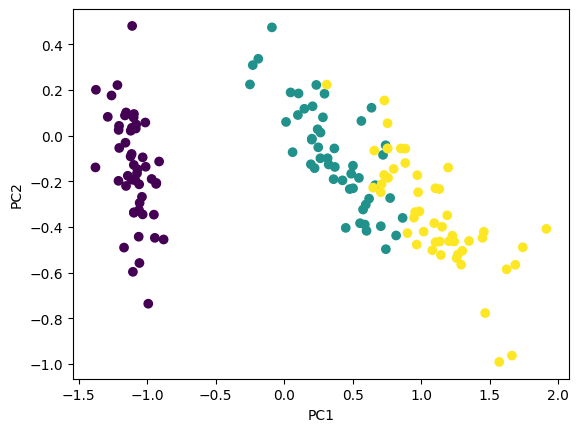

In [67]:
plt.scatter(X_new[:, 0], X_new[:, 1], c = y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Explained variance: [72.96 22.85  3.67  0.52]
Cumulative explained variance: [ 72.96  95.81  99.48 100.  ]


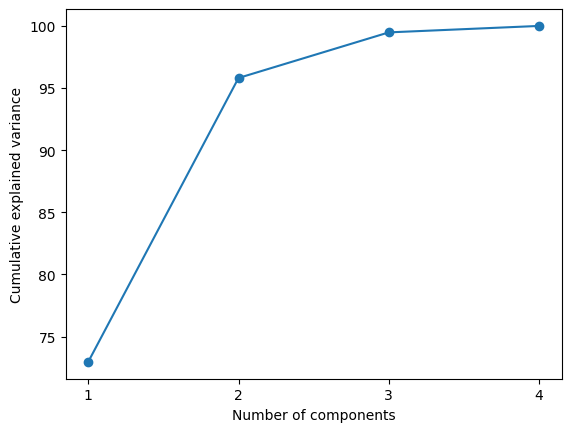

In [73]:
eig_vals_total = sum(eig_vals)
explained_variance = [(i / eig_vals_total)*100 for i in eig_vals]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

plt.plot(np.arange(1,X.shape[1]+1), cum_explained_variance, '-o')
plt.xticks(np.arange(1,X.shape[1]+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.show()
